[View in Colaboratory](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/part12.ipynb)

# 원핫 인코딩을 알아보자
- 데이터 다운로드: https://www.kaggle.com/c/titanic/data
- 다운로드 받아서 구글 드라이브에 넣어두자

In [30]:
# 구글 드라이브에 연결하기 위한 설치와 인증
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpbb8rzni3/pubring.gpg' created
gpg: /tmp/tmpbb8rzni3/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


KeyboardInterrupt: ignored

In [0]:
# 폴더를 만들어서 구글 드라이브 연동
!mkdir -p drive 
!google-drive-ocamlfuse drive 

In [5]:
cd drive/kaggle/titanic

/content/drive/kaggle/titanic


In [7]:
ls -al

total 96
drwxr-xr-x 2 root root  4096 May 23 10:09 ./
drwxr-xr-x 2 root root  4096 May 21 05:19 ../
-rw-r--r-- 1 root root 28629 May 23 10:09 test.csv
-rw-r--r-- 1 root root 61194 May 23 10:09 train.csv


In [32]:
import pandas as pd
import numpy as np

print(np.__version__)
pd.__version__

1.14.3


'0.22.0'

In [33]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
test.shape

(891, 12)


(418, 11)

In [34]:
print(train.dtypes)
test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
# 수치 데이터는 딥러닝에 바로 넣을 수 있다. 
# Object 타입만 추출해보자

obj_df = train.select_dtypes(include='object').copy()
obj_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [38]:
obj_df['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
E101               3
C22 C26            3
F33                3
D                  3
C78                2
E121               2
B57 B59 B63 B66    2
E67                2
B77                2
C124               2
C93                2
C68                2
B22                2
D36                2
B28                2
C2                 2
B5                 2
E25                2
D33                2
B20                2
B51 B53 B55        2
D17                2
E33                2
D26                2
F G73              2
C123               2
                  ..
C50                1
C45                1
C32                1
B69                1
C47                1
E63                1
C86                1
E58                1
A26                1
D11                1
B78                1
C104               1
A6                 1
D49                1
T                  1
C111               1
C91          

# 전처리를 해보자

In [0]:
# 처리하기 위한 데이터를 안전하게 복사해서 사용하자
train_c_df = train.copy()
test_c_df = test.copy()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


male      577
female    314
Name: Sex, dtype: int64

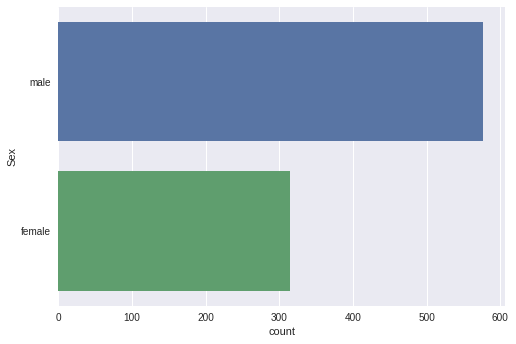

In [40]:
# 성별

import seaborn as sns
sns.countplot(y='Sex', data = train_c_df)
train['Sex'].value_counts()

In [41]:
# 성별을 0과 1로 바꿔줘보자
train['Sex'] = train['Sex'].apply(lambda s: 1 if s == 'female' else 0)
test['Sex'] = test['Sex'].apply(lambda s: 1 if s == 'female' else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [42]:
train_c_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 여기서부터는 Part 12 - 1

## 사이킷런의 LabelEncoder 를 써서 원핫 인코딩 해보자

In [43]:
from sklearn.preprocessing import LabelEncoder

# 성별을 0과 1로 인코딩하기
def gender_to_int(data):
  le = LabelEncoder()
  le.fit(["male", "female"])
  data["Sex"] = le.transform(data["Sex"])
  return data

# 테스트용으로  카피해두자
train2 = train_c_df.copy()
test2 = test_c_df.copy()

train2 = gender_to_int(train2)
test2 = gender_to_int(test2)
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### 승선위치는 그냥 판다스로 해보자

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


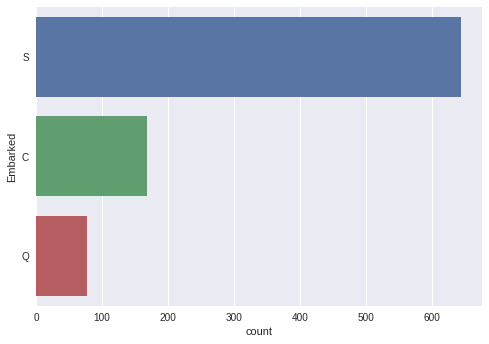

In [44]:
sns.countplot(y='Embarked', data=train2)

In [46]:
train2["E_C"] = train2["Embarked"] =="C"
train2["E_S"] = train2["Embarked"] =="S"
train2["E_Q"] = train2["Embarked"] =="Q"
train2[["E_C", "E_S", "E_Q"]].head(10)  # True, False 가 나오는데 이걸 집어넣으면 1과 0이 된다. 

,E_C,E_S,E_Q
0,False,True,False
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,False,True
6,False,True,False
7,False,True,False
8,False,True,False
9,True,False,False


# 판다스의 get_dummies 로 원핫인코딩 해보자
- https://goo.gl/p9HArb

In [47]:
def dummy_data(data, columns):
  for column in columns:
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop(column, axis=1)
  return data


dummy_columns = ["Sex", "Pclass", "Embarked"]  # 수치가 아닌 Object 타입의 컬럼들
train_dummy = dummy_data(train, dummy_columns)
test_dummy = dummy_data(test, dummy_columns)

print('원핫인코딩 전 shape')
print(train.shape)
print(test.shape)

print('get_dummies로 원핫인코딩 후 shape')
print(train_dummy.shape)
print(test_dummy.shape)


원핫인코딩 전 shape
(891, 12)
(418, 11)
get_dummies로 원핫인코딩 후 shape
(891, 17)
(418, 16)


In [48]:
test_dummy.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,0,0,1,0,0,1


In [49]:
train_dummy.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,0,1,0,0,1


In [0]:
# 이제 사용하지 않을 데이터는 drop 해주자
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId", "Name", "Ticket", "Cabin"]
X_train = drop_not_concerned(train_dummy, not_concerned_columns)
X_train = X_train.drop('Survived', axis=1)
X_test = drop_not_concerned(test_dummy, not_concerned_columns)